### Efficient Supply Chain Management using Graph Neural Networks (GNNs)

**Notebook-2**

**Author:** Kunal Kishore || 22810041

In this notebook, SupplyGraph data has been analyzed and visualized.

SupplyGraph data is available at the repository [https://github.com/CIOL-SUST/SupplyGraph](https://github.com/CIOL-SUST/SupplyGraph).


To succesfully run this notebook put  Dataset from "SupplyGraph/Raw Dataset/Homogenoeus" into same location as this notebook


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv



## 1.Read Data from Files: NODES
Here we will read and visualize node data of the supply chain.


### Nodes (Nodes.csv)

The "Nodes.csv" file contains data in the following format:

- **Node**: Name or index of the node in the supply chain.

Here is a preview of the first few rows:

|        Node       |
|-------------------|
|     SOS008L02P    |
|     SOS005L04P    |
|     SOS003L04P    |
|     SOS002L09P    |
|     SOS001L12P    |

This file contains information about nodes in the supply chain, where each node is identified by its name or index.


In [ ]:
# Read nodes from the CSV file
nodes_df = pd.read_csv( "Nodes/Nodes.csv")
nodes = list(nodes_df['Node'])

print(nodes)

['SOS008L02P', 'SOS005L04P', 'SOS003L04P', 'SOS002L09P', 'SOS001L12P', 'SOS500M24P', 'SOS250M48P', 'SOP001L12P', 'POV005L04P', 'POV002L09P', 'POV001L24P', 'POV500M24P', 'POP001L12P', 'POP015K', 'SO0005L04P', 'SO0002L09P', 'SO0001L12P', 'SO0500M24P', 'POP005L04P', 'POP002L09P', 'POP001L12P', 'POP500M24P', 'POPF01L12P', 'AT5X5K', 'ATN02K12P', 'ATN01K24P', 'MAR02K12P', 'MAR01K24P', 'ATWWP002K12P', 'ATWWP001K24P', 'MASR025K', 'MAHS025K', 'SE500G24P', 'SE200G24P', 'ATPPCH5X5K', 'ATPA1K24P', 'MAPA1K24P', 'MAP1K25P', 'MAC1K25P', 'EEA500G12P', 'EEA200G24P']


### NodesIndex.csv

The "NodesIndex.csv" file contains data in the following format:

- **Node**: Name or index of the node in the supply chain.
- **NodeIndex**: Index assigned to the node.

Here is a preview of the first few rows:

|        Node       | NodeIndex |
|-------------------|-----------|
|     SOS008L02P    |     0     |
|     SOS005L04P    |     1     |
|     SOS003L04P    |     2     |
|     SOS002L09P    |     3     |

This file contains information about nodes in the supply chain, where each node is identified by its name or index, along with the assigned index.


In [ ]:
# Read nodes and their indices from the CSV file
nodes_index_df = pd.read_csv("Nodes/NodesIndex.csv")

# Create a dictionary mapping nodes to their indices
nodes_index = {row['Node']: row['NodeIndex'] for _, row in nodes_index_df.iterrows()}

# Print the dictionary
print(nodes_index)

{'SOS008L02P': 0, 'SOS005L04P': 1, 'SOS003L04P': 2, 'SOS002L09P': 3, 'SOS001L12P': 4, 'SOS500M24P': 5, 'SOS250M48P': 6, 'SOP001L12P': 7, 'POV005L04P': 8, 'POV002L09P': 9, 'POV001L24P': 10, 'POV500M24P': 11, 'POP001L12P': 12, 'POP015K': 13, 'SO0005L04P': 14, 'SO0002L09P': 15, 'SO0001L12P': 16, 'SO0500M24P': 17, 'POP005L04P': 18, 'POP002L09P': 19, 'POP500M24P': 20, 'POPF01L12P': 21, 'AT5X5K': 22, 'ATN02K12P': 23, 'ATN01K24P': 24, 'MAR02K12P': 25, 'MAR01K24P': 26, 'ATWWP002K12P': 27, 'ATWWP001K24P': 28, 'MASR025K': 29, 'MAHS025K': 30, 'SE500G24P': 31, 'SE200G24P': 32, 'ATPPCH5X5K': 33, 'ATPA1K24P': 34, 'MAPA1K24P': 35, 'MAP1K25P': 36, 'MAC1K25P': 37, 'EEA500G12P': 38, 'EEA200G24P': 39}


### Nodes Type (Plant & Storage).csv

The "Nodes Type (Plant & Storage).csv" file contains data in the following format:

- **Node**: Name or index of the node in the supply chain.
- **Plant**: Plant code associated with the node.
- **Storage Location**: Storage location code associated with the node.

Here is a preview of the first few rows:

|       Node      | Plant | Storage Location |
|-----------------|-------|------------------|
|    POV002L09P   |  2120 |       2030       |
|    SOS001L12P   |  2120 |       2030       |
|    POP002L09P   |  2120 |       2030       |
|    POP001L12P   |  2120 |       2030       |
|    POP001L12P   |  2120 |       2030       |

This file contains information about nodes in the supply chain, where each node is associated with a plant code and a storage location code.


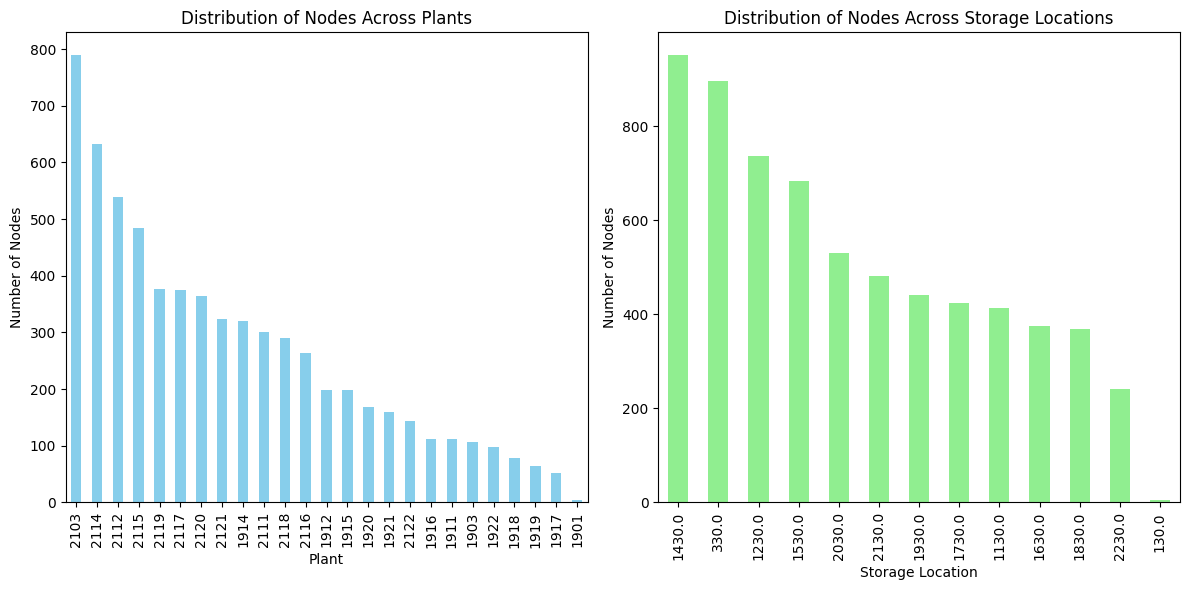

In [ ]:
# Read Nodes Type (Plant & Storage) from CSV
nodes_type_df  = pd.read_csv("Nodes/Nodes Type (Plant & Storage).csv")

# Count the number of nodes in each plant and storage location
plant_counts = nodes_type_df['Plant'].value_counts()
storage_counts = nodes_type_df['Storage Location'].value_counts()
"""
print("Number of nodes in each plant:")
print(plant_counts)
print("\nNumber of nodes in each storage location:")
print(storage_counts)
"""

# Plot the distribution of nodes across different plants and storage locations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plant_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Nodes Across Plants')
plt.xlabel('Plant')
plt.ylabel('Number of Nodes')

plt.subplot(1, 2, 2)
storage_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Nodes Across Storage Locations')
plt.xlabel('Storage Location')
plt.ylabel('Number of Nodes')

plt.tight_layout()
plt.show()

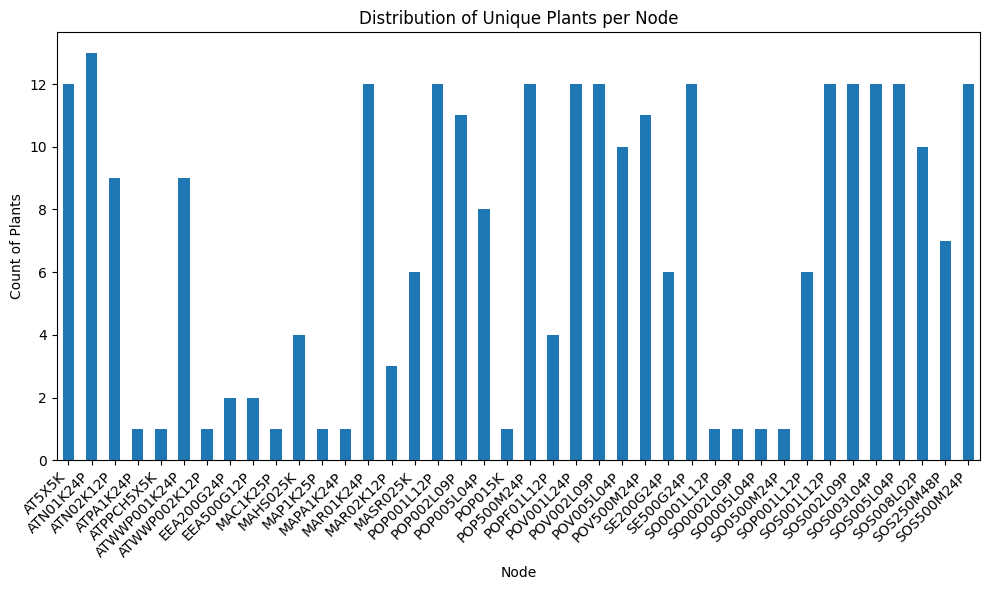

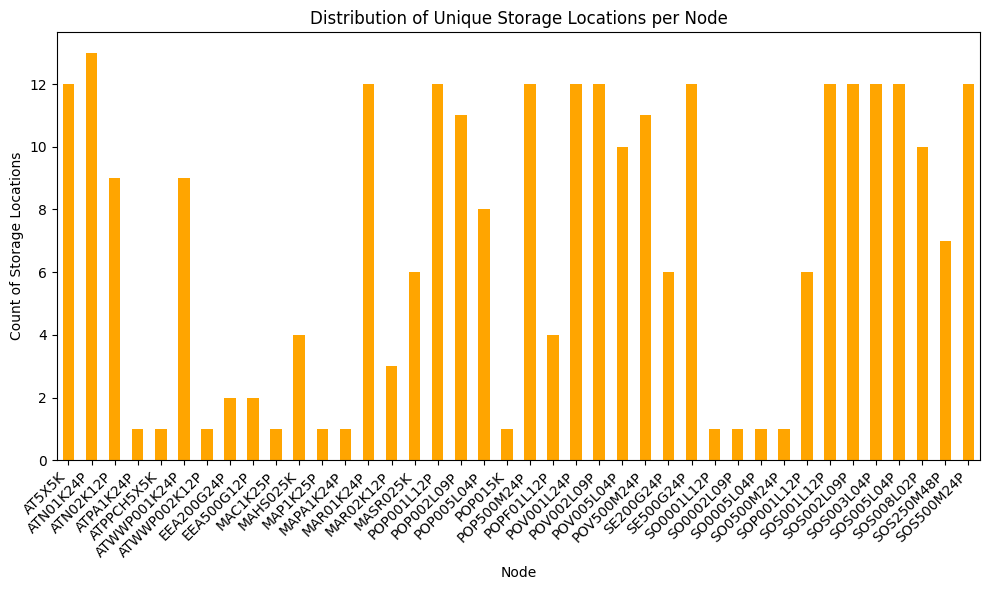

In [ ]:
# Calculate the count of unique plants/locations per node
unique_plants_per_node = nodes_type_df.groupby('Node')['Plant'].nunique()
unique_locations_per_node = nodes_type_df.groupby('Node')['Storage Location'].nunique()
"""
print("Number of unique plants per node:")
print(unique_plants_per_node)
print("\nNumber of unique storage locations per node:")
print(unique_locations_per_node)
"""

# Plot the distribution of unique plants per node
plt.figure(figsize=(10, 6))
unique_plants_per_node.plot(kind='bar')
plt.title('Distribution of Unique Plants per Node')
plt.xlabel('Node')
plt.ylabel('Count of Plants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the distribution of unique storage locations per node
plt.figure(figsize=(10, 6))
unique_locations_per_node.plot(kind='bar', color='orange')
plt.title('Distribution of Unique Storage Locations per Node')
plt.xlabel('Node')
plt.ylabel('Count of Storage Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Node Types (Product Group and Subgroup).csv

The "Node Types (Product Group and Subgroup).csv" file contains data in the following format:

- **Node**: Name or index of the node in the supply chain.
- **Group**: Product group associated with the node.
- **Sub-Group**: Product sub-group associated with the node.

Here is a preview of the first few rows:

|     Node    | Group | Sub-Group |
|-------------|-------|-----------|
|  SOS008L02P |   S   |    SOS    |
|  SOS005L04P |   S   |    SOS    |
|  SOS003L04P |   S   |    SOS    |
|  SOS002L09P |   S   |    SOS    |
|  SOS001L12P |   S   |    SOS    |

This file contains information about nodes in the supply chain, where each node is associated with a product group and a product sub-group.


Number of nodes in each group:
Group
S    14
P    11
A     7
M     7
E     2
Name: count, dtype: int64

Number of nodes in each subgroup:
Sub-Group
SOS       7
POP       6
POV       4
SO        4
ATN       2
SE        2
MAR       2
ATWWP     2
EEA       2
AT        1
SOP       1
MASR      1
MAHS      1
POPF      1
ATPPCH    1
ATPA      1
MAPA      1
MAP       1
MAC       1
Name: count, dtype: int64


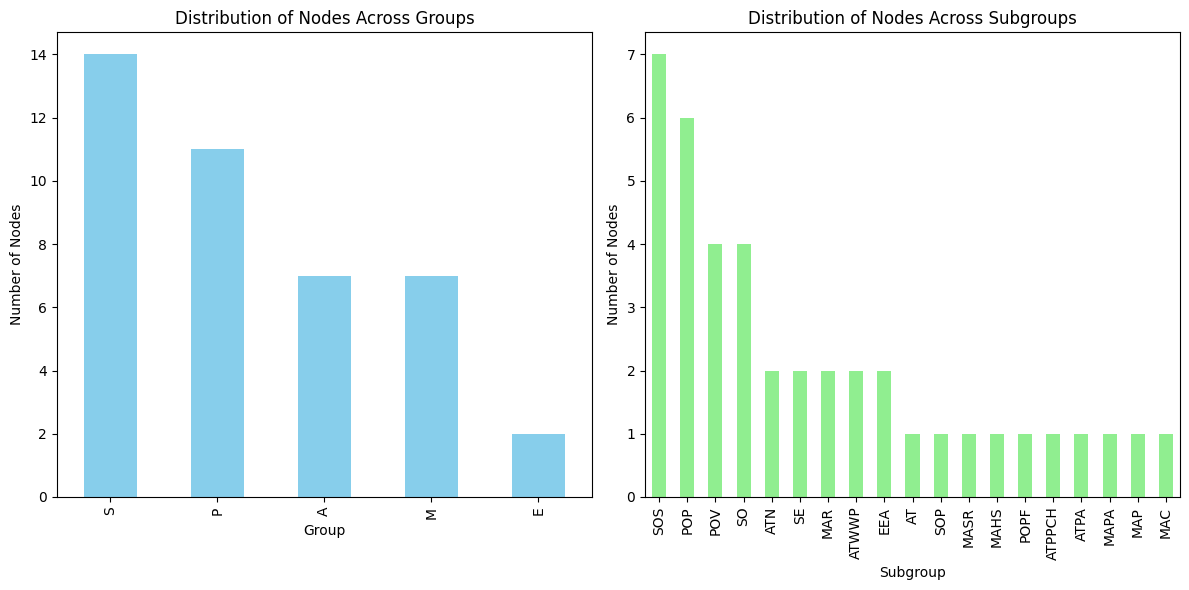

In [ ]:
# Read Node Types (Product Group and Subgroup) from CSV
nodes_type_product_df = pd.read_csv("Nodes/Node Types (Product Group and Subgroup).csv")

# Display the DataFrame
#print(nodes_type_product_df.head() )

# Count the number of nodes in each group and subgroup
group_counts = nodes_type_product_df['Group'].value_counts()
subgroup_counts = nodes_type_product_df['Sub-Group'].value_counts()
print("Number of nodes in each group:")
print(group_counts)
print("\nNumber of nodes in each subgroup:")
print(subgroup_counts)


# Plot the distribution of nodes across different groups and subgroups
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Nodes Across Groups')
plt.xlabel('Group')
plt.ylabel('Number of Nodes')

plt.subplot(1, 2, 2)
subgroup_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Nodes Across Subgroups')
plt.xlabel('Subgroup')
plt.ylabel('Number of Nodes')

plt.tight_layout()
plt.show()


## 2. Read Data from Files: EDGES

Here we will read and visualize edge data of the supply chain. **We are using edge files containing node indices instead of files containing explicit node names.** Both types of files are present in the dataset.


### Edges (Plant).csv

The "Edges (Plant).csv" file contains data in the following format:

- **Plant**: Index or identifier of the plant in the supply chain.
- **node1**: Index or identifier of the first node in the edge.
- **node2**: Index or identifier of the second node in the edge.

Here is a preview of the first few rows:

| Plant | node1 | node2 |
|-------|-------|-------|
|  1901 |    28 |    24 |
|  1903 |    22 |    24 |
|  1903 |    22 |    26 |
|  1903 |    22 |    31 |
|  1903 |    22 |    29 |
|  1903 |    22 |    23 |

This file contains information about edges between nodes in the supply chain, where each edge is associated with a specific plant.


In [ ]:
# Read the edges index data
edge_plant_df = pd.read_csv("Edges/EdgesIndex/Edges (Plant).csv")


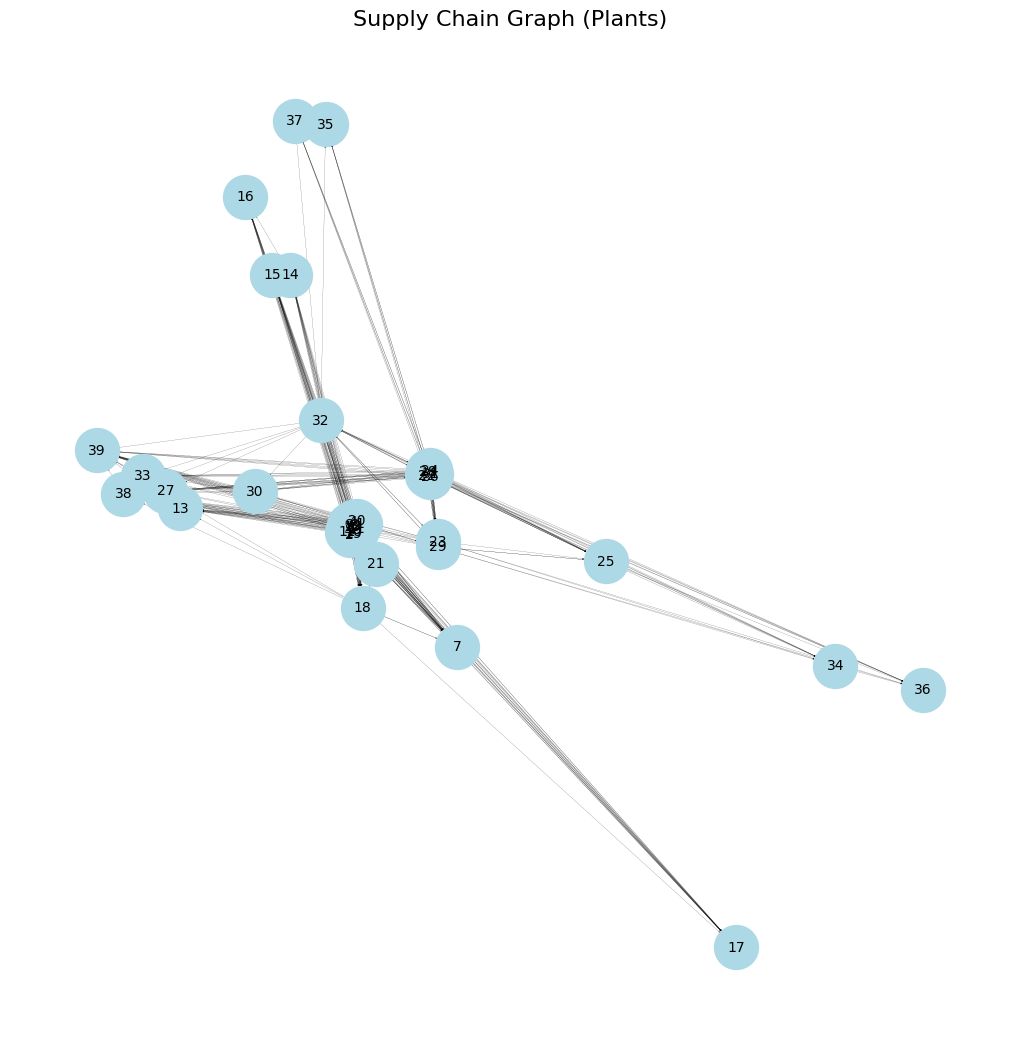

In [ ]:
# Create an empty directed graph
supply_chain_graph = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_index_df.iterrows():
    supply_chain_graph.add_node(row['NodeIndex'])

# Add edges to the graph
for index, row in edge_plant_df.iterrows():
    supply_chain_graph.add_edge(row['node1'], row['node2'])

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(supply_chain_graph)
nx.draw(supply_chain_graph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, arrowsize=2, width=0.1)
plt.title("Supply Chain Graph (Plants)", fontsize=16)  # Increase title size to 16
plt.show()



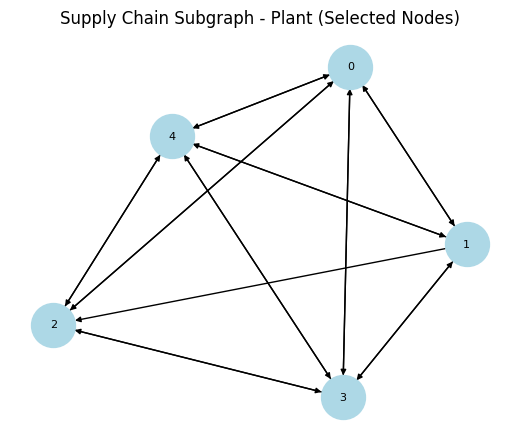

In [ ]:
# Selecting Nodes for subgraph
node_indices = [0, 1, 2, 3, 4]  #

# Create a directed graph
supply_chain_graph2 = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_index_df.iterrows():
    supply_chain_graph2.add_node(row['NodeIndex'])

# Add edges to the graph
for index, row in edge_plant_df.iterrows():
    supply_chain_graph2.add_edge(row['node1'], row['node2'])


# Create a subgraph containing only the selected nodes and their neighbors
subgraph = supply_chain_graph2.subgraph(node_indices)

# Visualize the subgraph
plt.figure(figsize=(5, 4))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, arrowsize=8)
plt.title("Supply Chain Subgraph - Plant (Selected Nodes)")
plt.show()


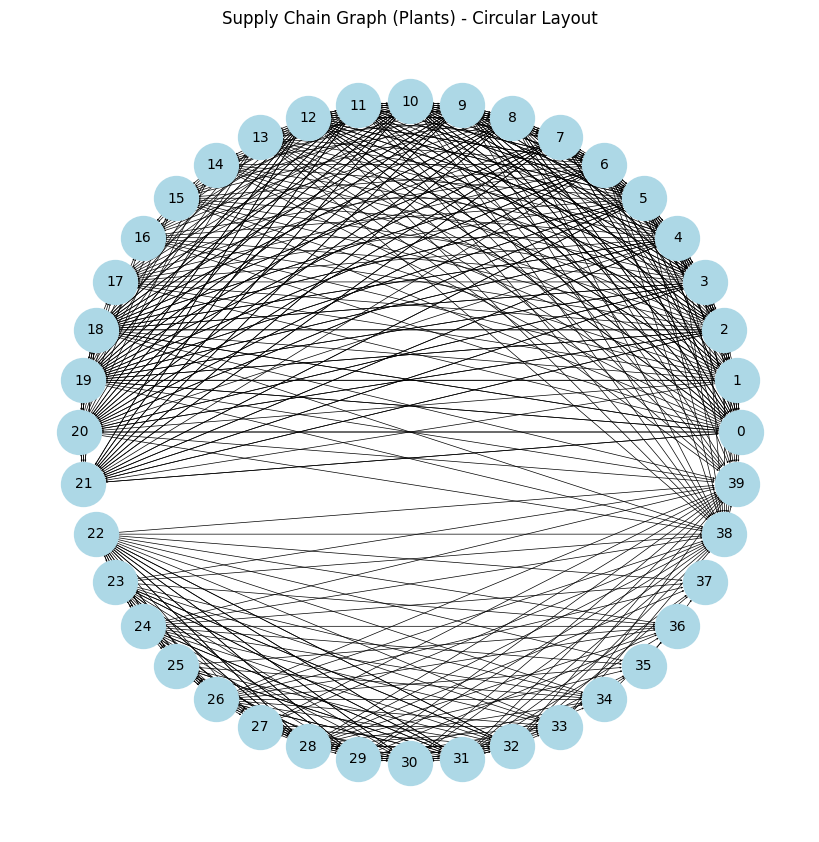

In [ ]:
# Create an empty directed graph
supply_chain_graph3 = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_index_df.iterrows():
    supply_chain_graph3.add_node(row['NodeIndex'])

# Add edges to the graph
for index, row in edge_plant_df.iterrows():
    supply_chain_graph3.add_edge(row['node1'], row['node2'])

# Position nodes in a circular layout
pos = nx.circular_layout(supply_chain_graph3)

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(supply_chain_graph3, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, arrowsize=2, width=0.5)
plt.title("Supply Chain Graph (Plants) - Circular Layout")
plt.show()


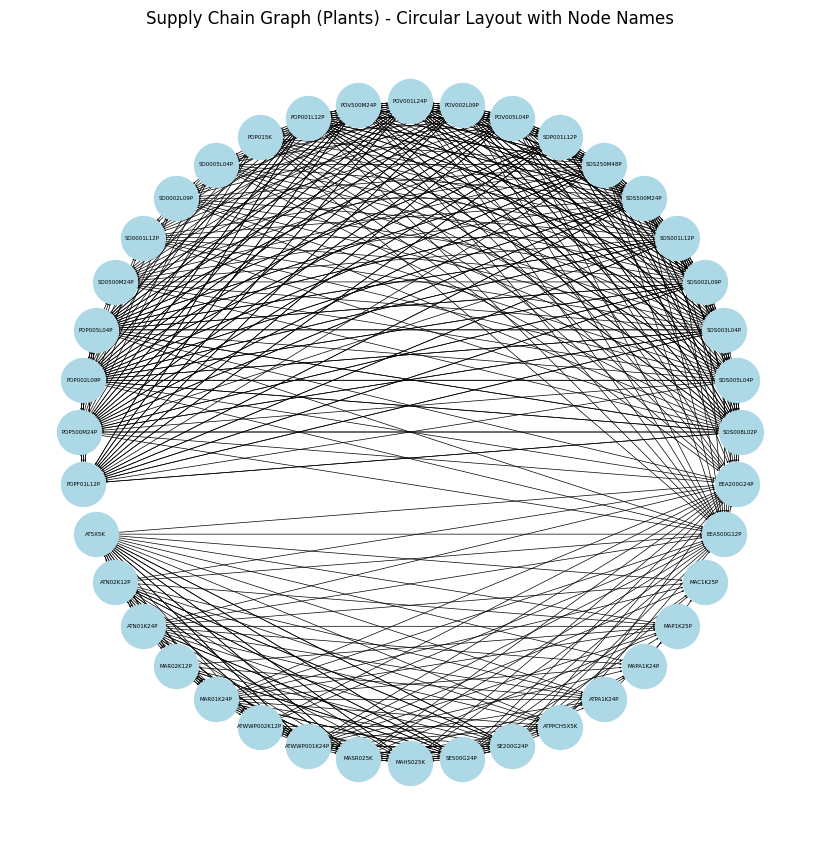

In [ ]:
# Create an empty directed graph
supply_chain_graph4 = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_index_df.iterrows():
    supply_chain_graph4.add_node(row['NodeIndex'], label=row['Node'])  # Add node names as labels

# Add edges to the graph
for index, row in edge_plant_df.iterrows():
    supply_chain_graph4.add_edge(row['node1'], row['node2'])

# Position nodes in a circular layout
pos = nx.circular_layout(supply_chain_graph4)

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(supply_chain_graph4, pos, with_labels=True, labels=nx.get_node_attributes(supply_chain_graph4, 'label'),
        node_size=1000, node_color='lightblue', font_size=4, arrowsize=2, width=0.5)
plt.title("Supply Chain Graph (Plants) - Circular Layout with Node Names")
plt.show()


### Edges (Product Group).csv

The "Edges (Product Group).csv" file contains data in the following format:

- **node1**: Index of the first node in the edge.
- **node2**: Index of the second node in the edge.
- **GroupCode**: Product group code associated with the edge.

Here is a preview of the first few rows:

| node1 | node2 | GroupCode |
|-------|-------|-----------|
|   0   |   1   |     S     |
|   0   |   2   |     S     |


In [ ]:
# Read the "Edges (Product Group).csv" file
edges_product_group_df = pd.read_csv("Edges/EdgesIndex/Edges (Product Group).csv")


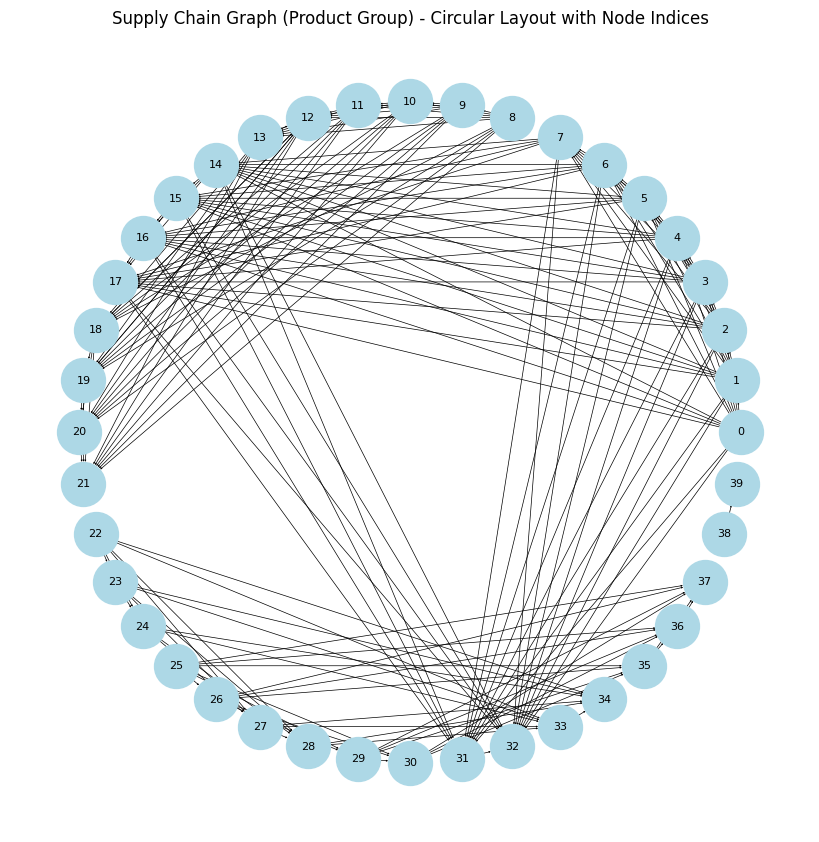

In [ ]:
# Create an empty directed graph
supply_chain_graph6 = nx.DiGraph()

# Add nodes to the graph
for index, row in nodes_index_df.iterrows():
    supply_chain_graph6.add_node(row['NodeIndex'])  # Only add node indices

# Add edges to the graph
for index, row in edges_product_group_df.iterrows():
    supply_chain_graph6.add_edge(row['node1'], row['node2'])

# Position nodes in a circular layout
pos = nx.circular_layout(supply_chain_graph6)

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(supply_chain_graph6, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, arrowsize=2, width=0.5)
plt.title("Supply Chain Graph (Product Group) - Circular Layout with Node Indices")
plt.show()


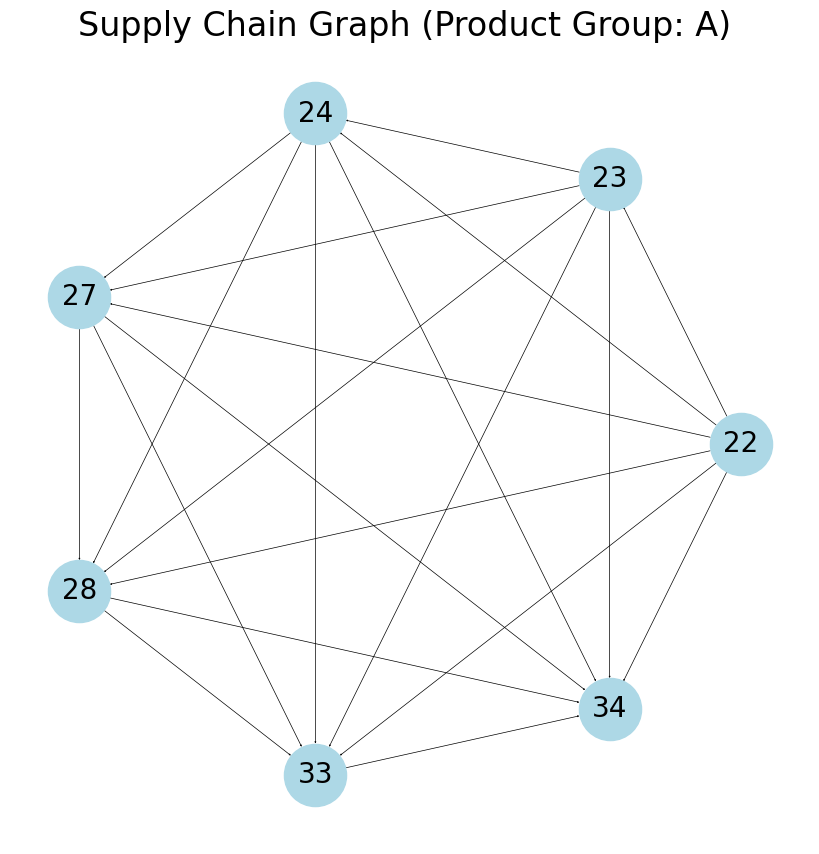

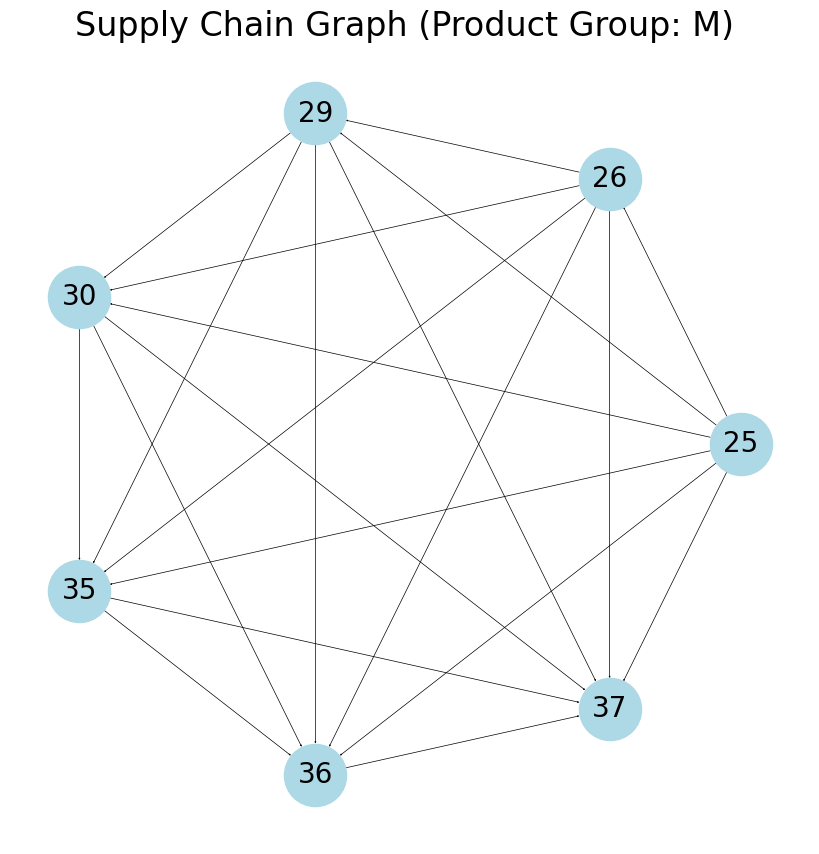

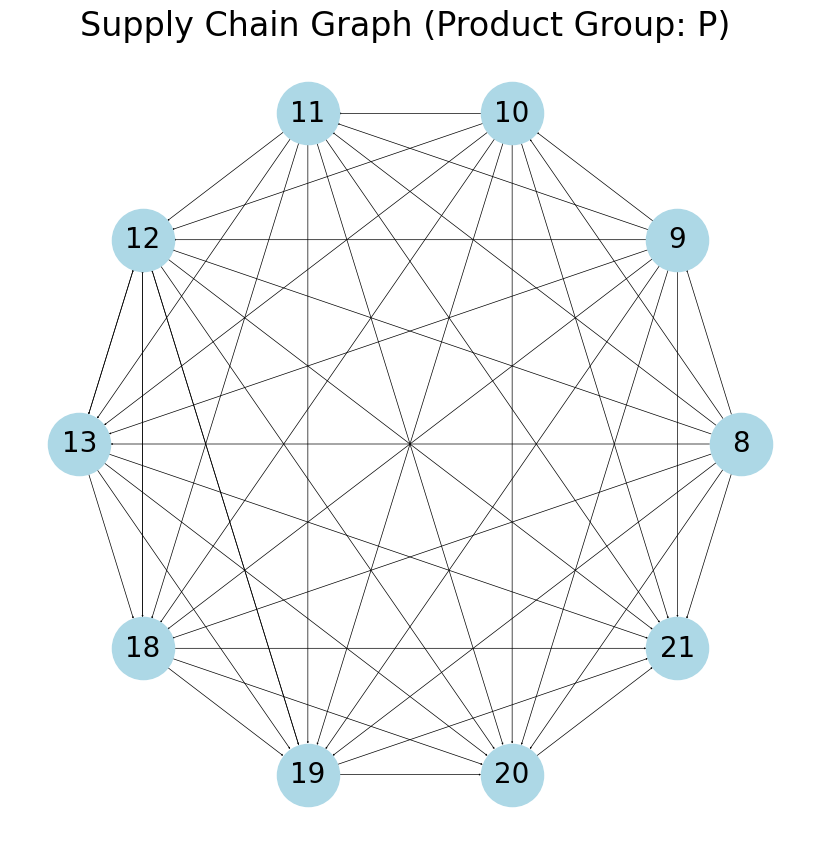

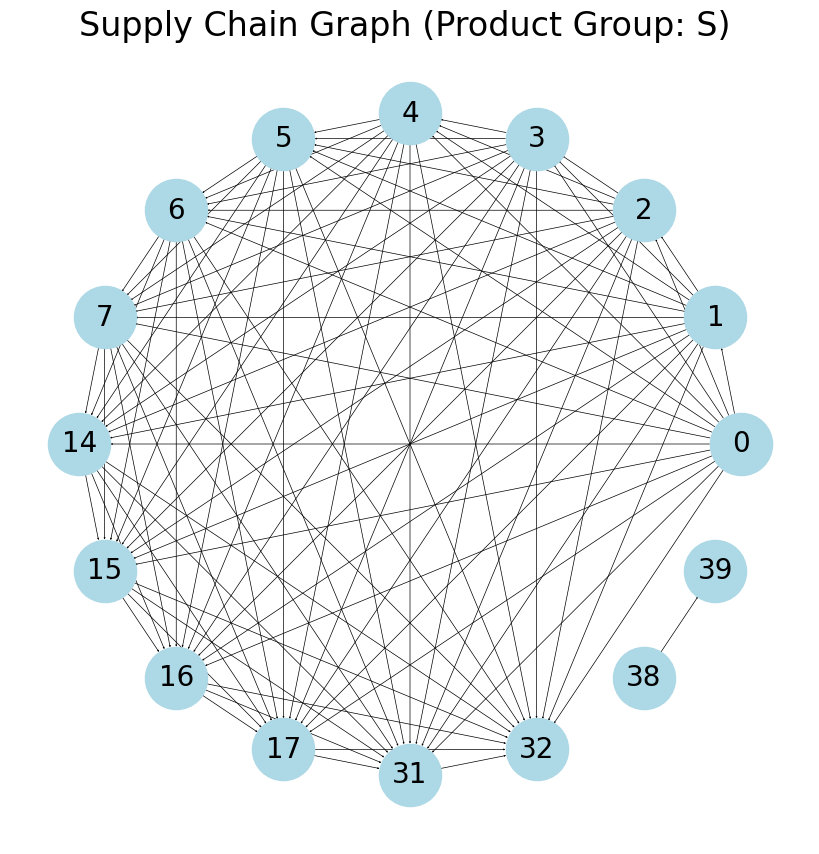

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Read the data
edges_product_group_df = pd.read_csv("Edges/EdgesIndex/Edges (Product Group).csv")
nodes_index_df = pd.read_csv("Nodes/NodesIndex.csv")

# Group edges by product group
grouped_edges = edges_product_group_df.groupby('GroupCode')

# Plot separate graph for each product group
for group, edges_group in grouped_edges:
    # Create an empty directed graph for the current group
    supply_chain_graph = nx.DiGraph()

    # Add nodes to the graph
    node_indices = set(edges_group['node1']).union(set(edges_group['node2']))
    for index, row in nodes_index_df.iterrows():
        if row['NodeIndex'] in node_indices:
            supply_chain_graph.add_node(row['NodeIndex'])

    # Add edges to the graph
    for index, row in edges_group.iterrows():
        supply_chain_graph.add_edge(row['node1'], row['node2'])

    # Position nodes in a circular layout
    pos = nx.circular_layout(supply_chain_graph)

    # Visualize the graph
    plt.figure(figsize=(8, 8))
    nx.draw(supply_chain_graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=20, arrowsize=2, width=0.5)
    plt.title(f"Supply Chain Graph (Product Group: {group}) ", fontsize=24)  # Increase title size to 24
    plt.show()


### Edges (Product  Sub Group).csv

The "Edges (Product Group).csv" file contains data in the following format:

- **node1**: Index of the first node in the edge.
- **node2**: Index of the second node in the edge.
- **SubGroupCode**: Product group code associated with the edge.



In [ ]:
# Read the "Edges (Product Sub-Group).csv" file
edges_subgroup_df = pd.read_csv("Edges/EdgesIndex/Edges (Product Sub-Group).csv")


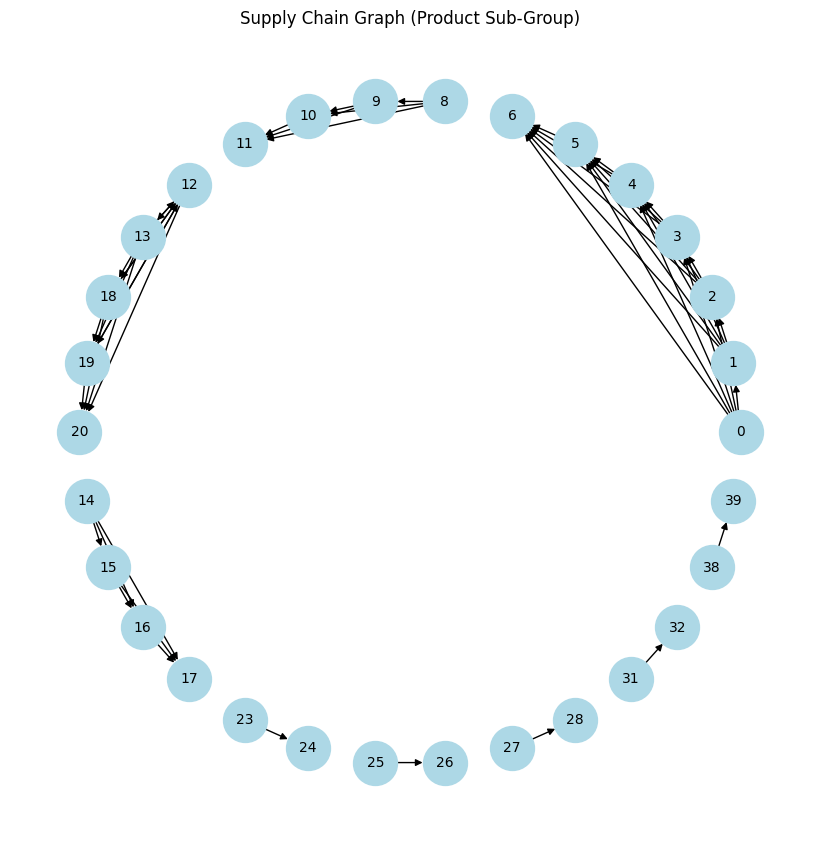

In [ ]:
# Create an empty directed graph
supply_chain_graph7 = nx.DiGraph()

# Add edges to the graph
for index, row in edges_subgroup_df.iterrows():
    supply_chain_graph7.add_edge(row['node1'], row['node2'], subgroup=row['SubGroupCode'])

# Position nodes in a circular layout
pos = nx.circular_layout(supply_chain_graph7)

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(supply_chain_graph7, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, arrowsize=10, width=1)
plt.title("Supply Chain Graph (Product Sub-Group)")
plt.show()


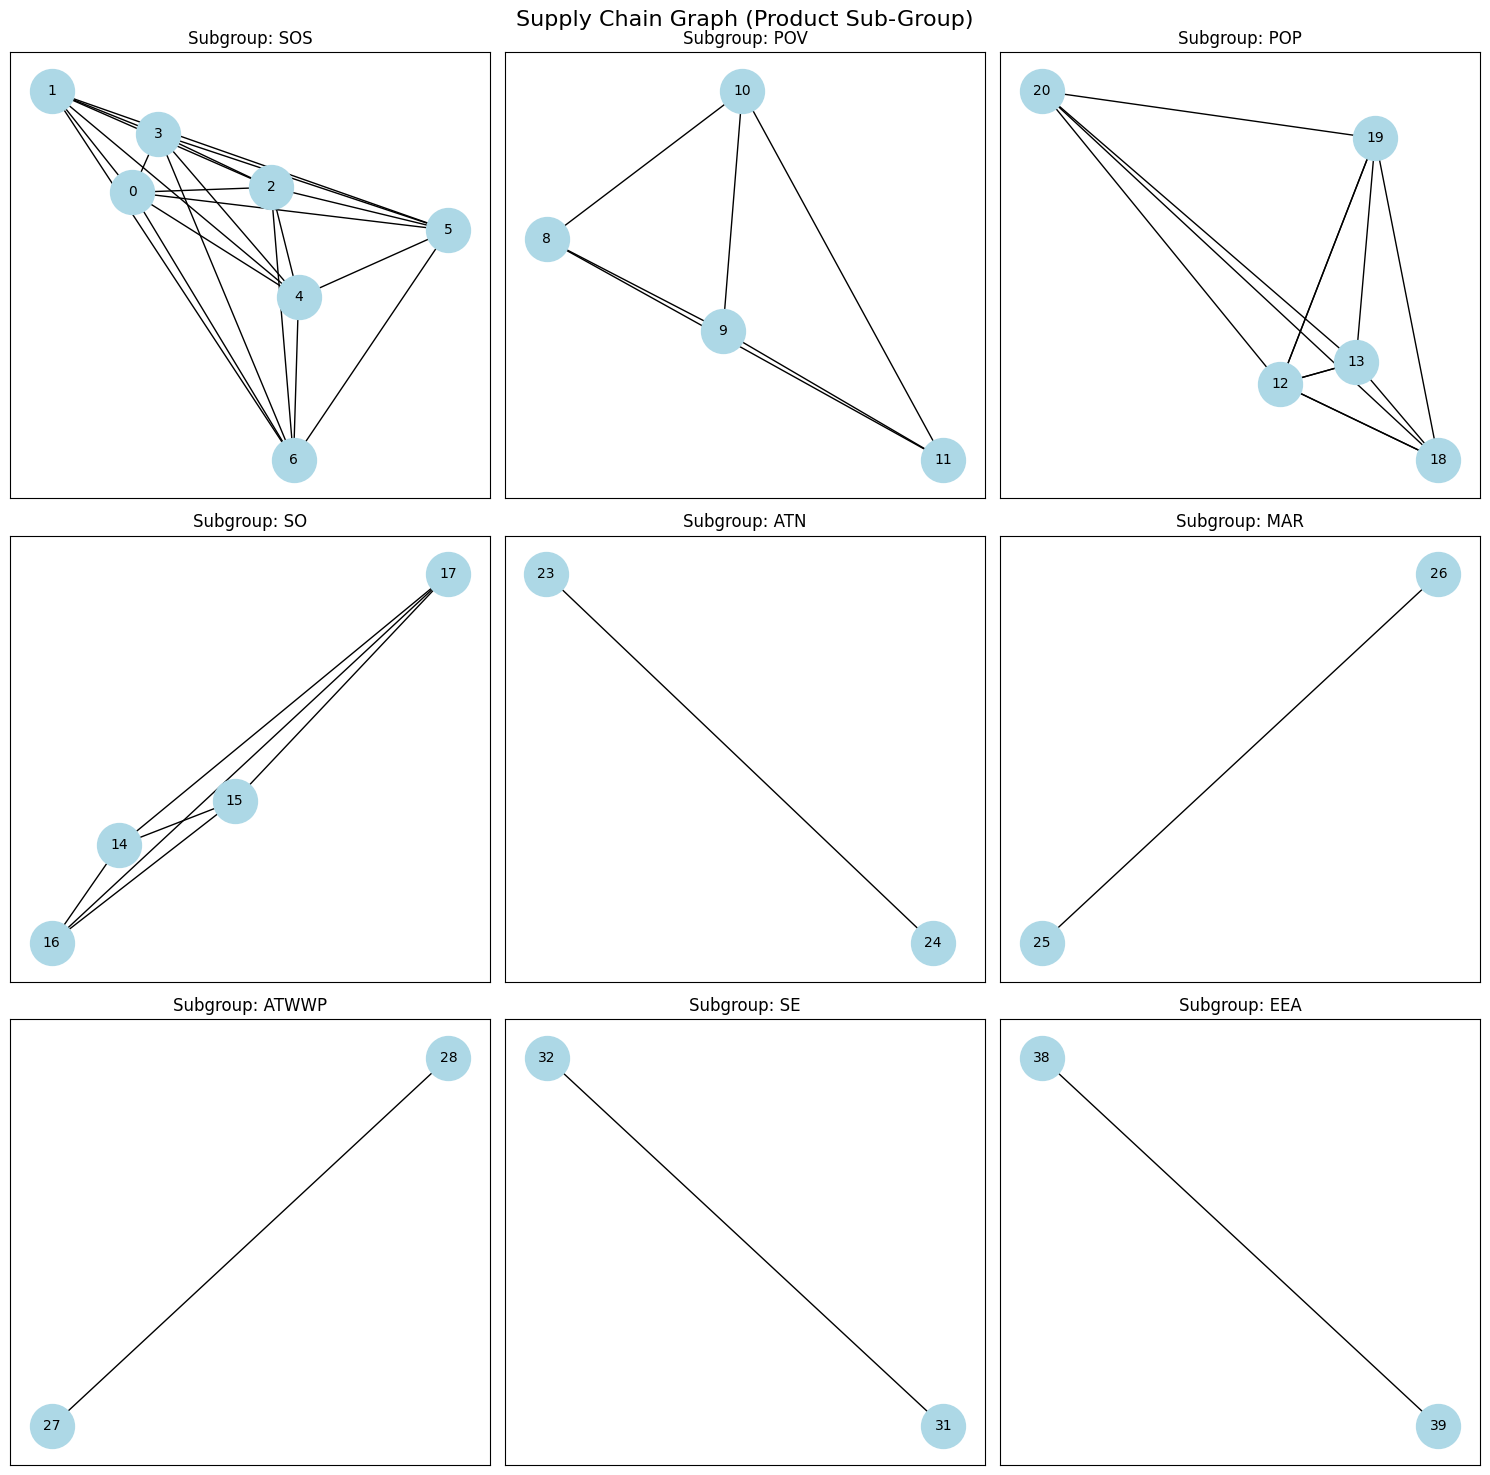

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.patches as patches

# Get unique subgroups
subgroups = edges_subgroup_df['SubGroupCode'].unique()

# Calculate the number of rows needed
num_rows = (len(subgroups) + 2) // 3  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create a separate graph for each subgroup
for i, subgroup in enumerate(subgroups):
    # Create an empty directed graph
    supply_chain_graph = nx.DiGraph()

    # Add edges to the graph for the current subgroup
    for index, row in edges_subgroup_df[edges_subgroup_df['SubGroupCode'] == subgroup].iterrows():
        supply_chain_graph.add_edge(row['node1'], row['node2'], subgroup=row['SubGroupCode'])

    # Position nodes using the spring layout algorithm
    pos = nx.spring_layout(supply_chain_graph, k=0.2, iterations=50)

    # Draw nodes and labels
    nx.draw_networkx_nodes(supply_chain_graph, pos, ax=axes[i], node_size=1000, node_color='lightblue')
    nx.draw_networkx_labels(supply_chain_graph, pos, ax=axes[i], font_size=10)

    # Draw edges
    nx.draw_networkx_edges(supply_chain_graph, pos, ax=axes[i], edge_color='black', width=1)

    # Add title
    axes[i].set_title(f"Subgroup: {subgroup}")


# Add overall title
plt.suptitle("Supply Chain Graph (Product Sub-Group)", fontsize=16)


# Hide any remaining empty subplots
for j in range(len(subgroups), num_rows * 3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
subgroups

array(['SOS', 'POV', 'POP', 'SO', 'ATN', 'MAR', 'ATWWP', 'SE', 'EEA'],
      dtype=object)

### Edges (Storage Location).csv

The "Edges (Storage Location).csv" file contains data in the following format:

- **Storage Location**: Index of the storage location associated with the edge.
- **node1**: Index of the first node in the edge.
- **node2**: Index of the second node in the edge.

Here is a preview of the first few rows:

| Storage Location | node1 | node2 |
|------------------|-------|-------|
|        130       |   28  |   24  |
|        330       |   1   |   3   |
|        330       |   1   |   2   |
|        330       |   1   |   5   |
|        330       |   1   |   4   |


In [ ]:
# Read the data from the "Edges (Storage Location).csv" file
edges_storage_df = pd.read_csv("Edges/EdgesIndex/Edges (Storage Location).csv")


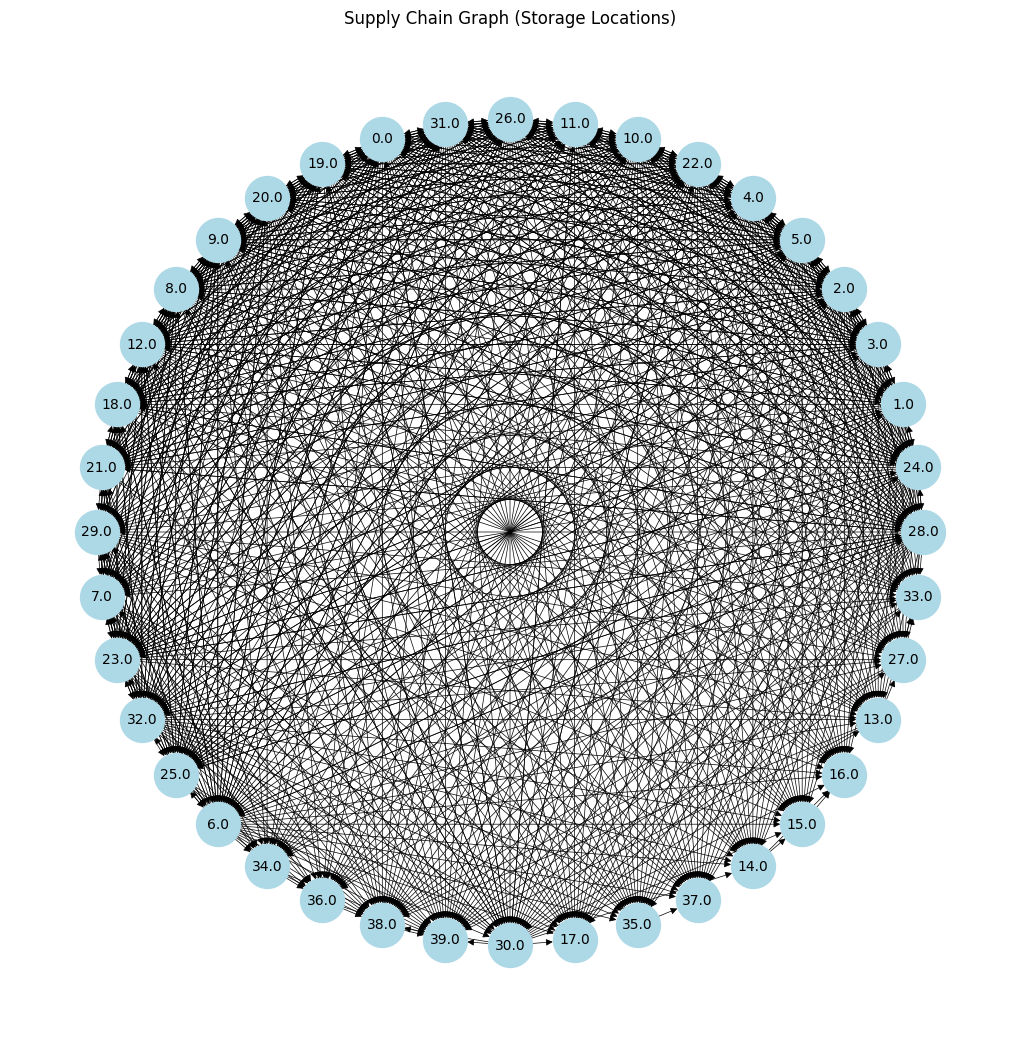

In [ ]:
# Create an empty directed graph
supply_chain_graph = nx.DiGraph()

# Add edges to the graph
for index, row in edges_storage_df.iterrows():
    supply_chain_graph.add_edge(row['node1'], row['node2'])

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(supply_chain_graph)
nx.draw(supply_chain_graph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, arrowsize=10, width=0.5)
plt.title("Supply Chain Graph (Storage Locations)")
plt.show()


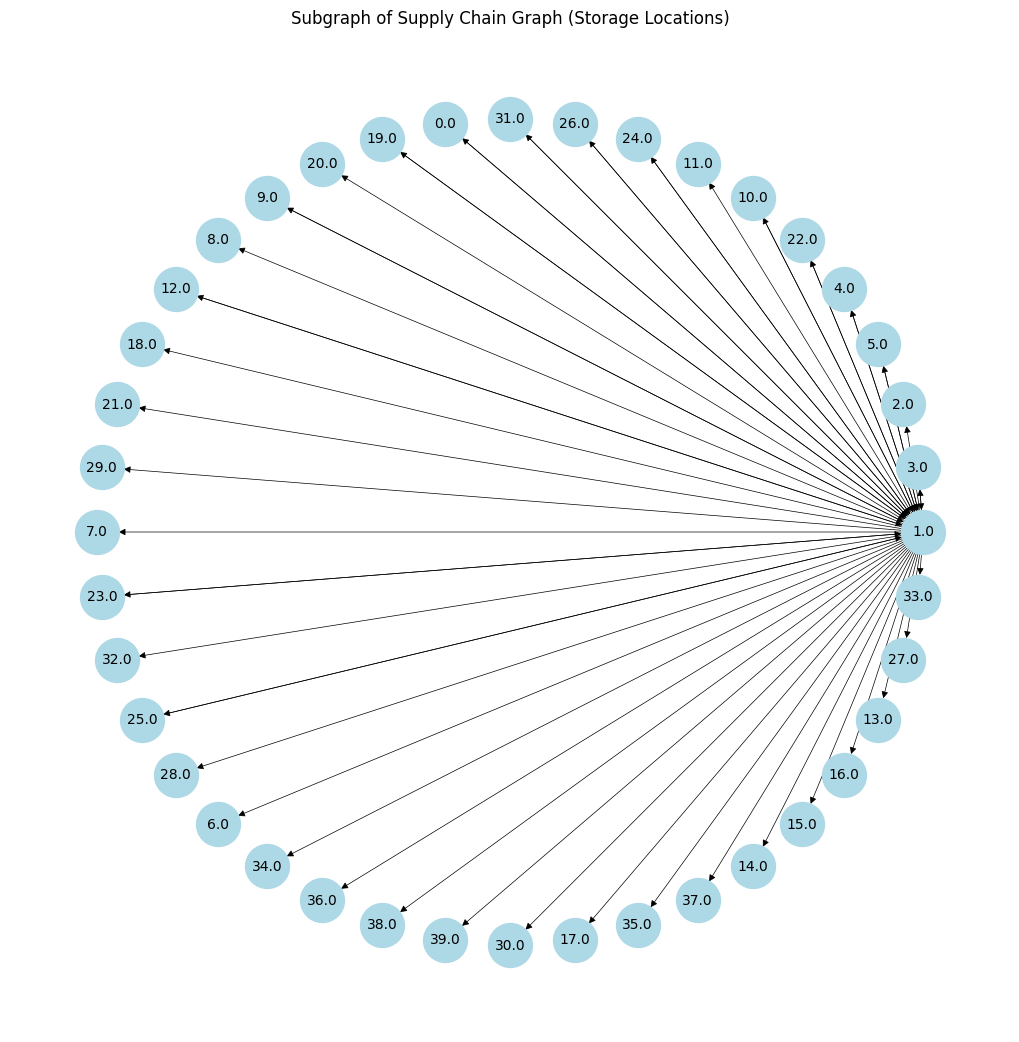

In [ ]:
# Define the nodes you want to include in the subgraph
subgraph_nodes = [1]  # Example nodes

# Filter edges dataframe to include only edges involving the subgraph nodes
subgraph_edges_df = edges_storage_df[edges_storage_df['node1'].isin(subgraph_nodes) | edges_storage_df['node2'].isin(subgraph_nodes)]

# Create an empty directed graph for the subgraph
subgraph = nx.DiGraph()

# Add edges to the subgraph
for index, row in subgraph_edges_df.iterrows():
    subgraph.add_edge(row['node1'], row['node2'])

# Visualize the subgraph
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, arrowsize=10, width=0.5)
plt.title("Subgraph of Supply Chain Graph (Storage Locations)")
plt.show()
